<a href="https://colab.research.google.com/github/quim-motger/NLP4RE_RelationExtraction/blob/main/NLP4RE_Chapter8_RelationExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚠️ **WARNING: NOTEBOOK UNDER DEVELOPMENT** ⚠️

# NLP4RE - Chapter 8 - Relation Extraction

## 1. Introduction

This notebook is an illustrative application of some of the techniques depicted in *Chapter 8 - Relation Extraction* from the NLP4RE book.

## 2. Data set

First, we install `pandas` to create a data frame from the original .xlsx files containing the requirements and annotated relations.


In [1]:
pip install pandas

We collect two data sets:


1.   **Binary classification**
2.   **Multiclass classification**



In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)  # Disable the warning

# Remote reference to labelled requirement relations (binary)
req_rel_b = 'https://drive.google.com/uc?id=1n_DYtv9ZusDdCqcuL9gQ63MKHQTSw2lw'
# Remote reference to labelled requirement relations (multi)
req_rel_m = 'https://drive.google.com/uc?id=1-ixd7-15d0a2ceaDjLE-XUF5Ea4z048a'

df_b = pd.read_csv(req_rel_b)
df_m = pd.read_csv(req_rel_m)

# Format label annotations as int types
df_b['BinaryClass'] = df_b['BinaryClass'].fillna(9999)
df_b['BinaryClass'] = df_b['BinaryClass'].astype(int)
df_m['MultiClass'] = df_m['MultiClass'].fillna(9999)
df_m['MultiClass'] = df_m['MultiClass'].astype(int)

# Columns with relevant properties
columns_b = ['req1_id', 'req1', 'req2_id', 'req2', 'BinaryClass']
columns_m = ['req1_id', 'req1', 'req2_id', 'req2', 'MultiClass']

# Printing the unique requirements data frame
pd.set_option('display.max_colwidth', None)
print("Binary Classification dataset")
display(df_b[columns_b].head())
print("MultiClass Classification dataset")
display(df_m[columns_m].head())

Binary Classification dataset


,req1_id,req1,req2_id,req2,BinaryClass
0,PURE_B001,the current operational status shall be indicated to the driver on the dmi,PURE_B004,the dmi shall indicate the result of the self-test,1
1,PURE_B002,isolation of the etcs trainborne equipment shall disconnect the etcs trainborne equipment from the vehicle braking system,PURE_B029,the etcs trainborne equipment shall transmit its own train identification to the rbc,0
2,PURE_B003,the driver shall know the distance to the next point defining the indicated braking curve and the permitted speed allowed this shall be shown to the driver in a way that is understandable and logical,PURE_B068,when the traction unit has come to a standstill the driver shall be able to release the emergency brake,0
3,PURE_B003,the driver shall know the distance to the next point defining the indicated braking curve and the permitted speed allowed this shall be shown to the driver in a way that is understandable and logical,PURE_B055,the driver shall be able to use the reversing function without needing to re-confirm the train data,0
4,PURE_B004,the dmi shall indicate the result of the self-test,PURE_B099,operation of the train trip shall be indicated on the dmi,1


MultiClass Classification dataset


,req1_id,req1,req2_id,req2,MultiClass
0,PURE_M001,the current operational status shall be indicated to the driver on the dmi,PURE_M002,the dmi shall indicate the result of the self-test,4
1,PURE_M002,the dmi shall indicate the result of the self-test,PURE_M016,operation of the train trip shall be indicated on the dmi,4
2,PURE_M003,the driver shall acknowledge the level transitions if requested from trackside if the driver does not acknowledge after the transition the brake shall be applied if the driver acknowledges afterwards the brake can be released,PURE_M005,the on board shall be capable of sending train data to the trackside after confirmation by the driver or when entering the rbc area,0
3,PURE_M004,to prevent unauthorised use of the function permission shall be obtained from the rbc if the train is operating under the control of the rbc,PURE_M042,the driver shall be able to use the reversing function without needing to re-confirm the train data,0
4,PURE_M005,the on board shall be capable of sending train data to the trackside after confirmation by the driver or when entering the rbc area,PURE_M042,the driver shall be able to use the reversing function without needing to re-confirm the train data,0


Collect unique requirements. Notice that unique IDs are assigned in parallel to MultiClass and BinaryClass datasets to facilitate replication and separation of experiments with both datasets - consequently, some requirements might appear in both datasets with different IDs.

In [3]:
import os

# Step 1: Drop duplicates from the original requirements list
df_b_not_duplicates = df_b[['req2', 'req2_id']].drop_duplicates()

# Step 2: Create a new data frame with the list of unique requirements and their indexes
df_b_unique_reqs = pd.DataFrame({
    'req_id': list(df_b_not_duplicates['req2_id']),
    'req': list(df_b_not_duplicates['req2']),
})

# Step 3: Repeat same procoess for multiclass data set
df_m_not_duplicates = df_m[['req2', 'req2_id']].drop_duplicates()
df_m_unique_reqs = pd.DataFrame({
    'req_id': list(df_m_not_duplicates['req2_id']),
    'req': list(df_m_not_duplicates['req2']),
})

# Printing the unique requirements data frame
pd.set_option('display.max_colwidth', None)
print(os.linesep + "Binary Dataset (unique requirements)")
display(df_b_unique_reqs.head())
print(os.linesep + "MultiClass Dataset (unique requirements)")
display(df_m_unique_reqs.head())


Binary Dataset (unique requirements)


,req_id,req
0,PURE_B004,the dmi shall indicate the result of the self-test
1,PURE_B029,the etcs trainborne equipment shall transmit its own train identification to the rbc
2,PURE_B068,when the traction unit has come to a standstill the driver shall be able to release the emergency brake
3,PURE_B055,the driver shall be able to use the reversing function without needing to re-confirm the train data
4,PURE_B099,operation of the train trip shall be indicated on the dmi



MultiClass Dataset (unique requirements)


,req_id,req
0,PURE_M002,the dmi shall indicate the result of the self-test
1,PURE_M016,operation of the train trip shall be indicated on the dmi
2,PURE_M005,the on board shall be capable of sending train data to the trackside after confirmation by the driver or when entering the rbc area
3,PURE_M042,the driver shall be able to use the reversing function without needing to re-confirm the train data
4,PURE_M008,on lines fitted with rbc the etcs trainborne equipment shall be able to transmit the location of the entire train to the rbc


Select relevant columns

Binary classification data


*   **0**: non-related
*   **1**: related



In [4]:
# Apply a filter to exclude instances with unknown annotation
df_b = df_b[df_b['BinaryClass'] != 9999]

# Use value_counts() to get the counts of unique values in BinaryClass
value_counts_b = df_b['BinaryClass'].value_counts()

# Create a new DataFrame to display the results
result_df_b = pd.DataFrame({'BinaryClass': value_counts_b.index, 'Occurrences': value_counts_b.values})

# Calculate the sum of all occurrences and append a last row to result_df_b
sum_occurrences = result_df_b['Occurrences'].sum()
last_row_df = pd.DataFrame([{'BinaryClass': 'Total', 'Occurrences': sum_occurrences}])
result_df_b = pd.concat([result_df_b, last_row_df], ignore_index=True)

# Display annotated data summary
display(result_df_b)

,BinaryClass,Occurrences
0,0,9469
1,1,1189
2,Total,10658


In [5]:
# Display first 5 requirement pairs
display(df_b[columns_b].head())

,req1_id,req1,req2_id,req2,BinaryClass
0,PURE_B001,the current operational status shall be indicated to the driver on the dmi,PURE_B004,the dmi shall indicate the result of the self-test,1
1,PURE_B002,isolation of the etcs trainborne equipment shall disconnect the etcs trainborne equipment from the vehicle braking system,PURE_B029,the etcs trainborne equipment shall transmit its own train identification to the rbc,0
2,PURE_B003,the driver shall know the distance to the next point defining the indicated braking curve and the permitted speed allowed this shall be shown to the driver in a way that is understandable and logical,PURE_B068,when the traction unit has come to a standstill the driver shall be able to release the emergency brake,0
3,PURE_B003,the driver shall know the distance to the next point defining the indicated braking curve and the permitted speed allowed this shall be shown to the driver in a way that is understandable and logical,PURE_B055,the driver shall be able to use the reversing function without needing to re-confirm the train data,0
4,PURE_B004,the dmi shall indicate the result of the self-test,PURE_B099,operation of the train trip shall be indicated on the dmi,1


Multiclass classification data

*   **0**: non-related
*   **3**: requires
*   **4**: similar

In [6]:
# Apply a filter to exclude instances with unknown annotation
df_m = df_m[df_m['MultiClass'] != 9999]

# Use value_counts() to get the counts of unique values in BinaryClass
value_counts_m = df_m['MultiClass'].value_counts()

# Create a new DataFrame to display the results
result_df_m = pd.DataFrame({'MultiClass': value_counts_m.index, 'Occurrences': value_counts_m.values})

# Calculate the sum of all occurrences and append a last row to result_df_b
sum_occurrences_m = result_df_m['Occurrences'].sum()
last_row_m = {'MultiClass': 'Total', 'Occurrences': sum_occurrences_m}
result_df_m = result_df_m.append(last_row_m, ignore_index=True)

# Display annotated data summary
display(result_df_m)

<ipython-input-6-7d185147d8c9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df_m = result_df_m.append(last_row_m, ignore_index=True)


,MultiClass,Occurrences
0,0,3655
1,3,362
2,4,334
3,Total,4351


In [7]:
# Display first 5 requirement pairs
display(df_m[columns_m].head())

,req1_id,req1,req2_id,req2,MultiClass
0,PURE_M001,the current operational status shall be indicated to the driver on the dmi,PURE_M002,the dmi shall indicate the result of the self-test,4
1,PURE_M002,the dmi shall indicate the result of the self-test,PURE_M016,operation of the train trip shall be indicated on the dmi,4
2,PURE_M003,the driver shall acknowledge the level transitions if requested from trackside if the driver does not acknowledge after the transition the brake shall be applied if the driver acknowledges afterwards the brake can be released,PURE_M005,the on board shall be capable of sending train data to the trackside after confirmation by the driver or when entering the rbc area,0
3,PURE_M004,to prevent unauthorised use of the function permission shall be obtained from the rbc if the train is operating under the control of the rbc,PURE_M042,the driver shall be able to use the reversing function without needing to re-confirm the train data,0
4,PURE_M005,the on board shall be capable of sending train data to the trackside after confirmation by the driver or when entering the rbc area,PURE_M042,the driver shall be able to use the reversing function without needing to re-confirm the train data,0


## 3. Syntactic NLP techniques

### 3.1. Text pre-processing techniques

NLP pre-processing and syntactic analysis of requirement documents using spaCy.



In [8]:
pip install -U spacy

  Using cached spacy-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
    Uninstalling spacy-3.5.4:
      Successfully uninstalled spacy-3.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
coreferee 1.4.1 requires spacy<3.6.0,>=3.0.0, but you have spacy 3.7.2 which is incompatible.
en-core-web-lg 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.7.2 which is incompatible.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
en-core-web-trf 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.7.2 which is incompatible.


In [9]:
pip install spacy-transformers

In [10]:
pip install coreferee

  Using cached spacy-3.5.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.2
    Uninstalling spacy-3.7.2:
      Successfully uninstalled spacy-3.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.5.4 which is incompatible.


We use a neural pipeline including: transformer-based tokenizer, attribute ruler, lemmatizer, part-of-speech (PoS) tagger and dependency parser.

Additionally, we download en_core_web_lg and we extend the baseline pipeline with coreference detection.

Model download might take a few seconds.

In [11]:
# Download neural model
import spacy.cli
spacy.cli.download("en_core_web_trf")

# Download en_core_web_lg for coreferee pipeline
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [12]:
!python -m coreferee install en

2024-01-21 10:14:19.623036: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 10:14:19.623110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 10:14:19.624546: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
  Using cached https://github.com/richardpaulhudson/coreferee/raw/master/models/coreferee_model_en.zip (65.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [13]:
!python -m spacy download en_core_web_trf --direct --dry-run

2024-01-21 10:15:11.387638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 10:15:11.387724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 10:15:11.389102: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 10:15:13.101109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ERROR: -en_core_web_trf-py3-none-any.whl is not a valid wheel filename.


In [14]:
# Import and load model
import spacy
import spacy_transformers
import coreferee

nlp = spacy.load('en_core_web_trf')

# We add coreference pipeline, see below
# nlp.add_pipe('coreferee')

We process the requirements. Change the first code line to use either the MultiClass (df_m) or the BinaryClass (df_b) dataset.

In [15]:
# Change to use either the binary or the multiclass dataset
reduced_df_m = df_m
#reduced_df_m = df_b

# Reduce the size of the set of requirements to the previous pairs
req1_ids = reduced_df_m['req1_id'].unique()
req2_ids = reduced_df_m['req2_id'].unique()
unique_req_ids = set().union(req1_ids, req2_ids)
reduced_df = df_m_unique_reqs[df_m_unique_reqs['req_id'].isin(unique_req_ids)]

# Display the complete set of requirements
display(reduced_df)

,req_id,req
0,PURE_M002,the dmi shall indicate the result of the self-test
1,PURE_M016,operation of the train trip shall be indicated on the dmi
2,PURE_M005,the on board shall be capable of sending train data to the trackside after confirmation by the driver or when entering the rbc area
3,PURE_M042,the driver shall be able to use the reversing function without needing to re-confirm the train data
4,PURE_M008,on lines fitted with rbc the etcs trainborne equipment shall be able to transmit the location of the entire train to the rbc
...,...,...
185,PURE_M168,based on all relevant data the etcs shall calculate an emergency braking curve and a service braking curve
186,PURE_M186,standardised output interfaces shall enable transmission of information recorded to other media for investigation
187,PURE_M175,full supervision shall provide supervision of speed and distance
188,PURE_M185,it shall be possible to manually select shunting from stand by operation full supervision operation or partial supervision operation


In [16]:
display(reduced_df_m[reduced_df_m['MultiClass'] == 3][columns_m].head())

,req1_id,req1,req2_id,req2,MultiClass
11,PURE_M011,the etcs on-board shall be capable of receiving national values from the trackside to adapt to national requirements,PURE_M073,the etcs on-board shall be capable of receiving information about pantograph and power supply from the trackside,3
72,PURE_M041,the dmi shall display or be compatible with information from national train control systems this may mean displaying the information shown by the national system,PURE_M183,information shall be shown on the dmi,3
175,PURE_M060,the etcs trainborne equipment shall be capable of supervising the following operational states,PURE_M055,the etcs on-board shall be capable of receiving track description from the trackside,3
191,PURE_M066,the etcs trainborne equipment shall indicate on the dmi the information regarding pantograph and power supply,PURE_M119,the information regarding lowering and raising of the pantograph and opening/closing of the circuit breaker shall be provided separately and in combinations,3
224,PURE_M071,there shall be no discrepancy between the speed shown to the driver and the speed used for supervision of movement authorities and speed limits function,PURE_M021,the supervised speed shall not be shown on the dmi,3


Now we process the complete subset of 190 requirements.

In [17]:
from tqdm import tqdm

# Intialize a list to store parsed docs
parsed_reqs = {}

# Iterate over each row in the DataFrame
for index, row in tqdm(reduced_df.iterrows()):
  req_doc = nlp(row['req'])

  parsed_reqs[row['req_id']] = {'req_doc': req_doc}

docs = []
for key in reduced_df['req_id'].values:
  docs.append(parsed_reqs[key]['req_doc'])
reduced_df['req_doc'] = docs

190it [00:56,  3.35it/s]


Sample of dependency tree for requirement PURE_M041.


In [18]:
from spacy import displacy

# Display the dependency tree of a requirement

# Customize the visualization options
options = {
    "bg": "#ffffff",          # Background color (white)
    "color": "#000000",       # Text color (black)
    "arrow_stroke": 1,
    "arrow_width": 6,
    "distance": 90,           # Adjust this value to control the minimum width
    "word_spacing": 20,       # Adjust this value to control word spacing
    "arrow_spacing": 5,      # Adjust this value to control arrow spacing
    "font": "Verdana"
}

displacy.render(parsed_reqs['PURE_M041']['req_doc'], style='dep', options=options, jupyter=True)
displacy.render(parsed_reqs['PURE_M113']['req_doc'], style='dep', options=options, jupyter=True)

### 3.2. Syntactic-Based NLP Knowledge Representation

Below we illustrate some of the techniques covered in the book chapter.

#### N-gram generation

Defining customized patterns using Spacy Matcher for a combined use of PoS and dependency parse patterns. Below we illustrate some common patterns to generate noun phrase chunking

In [19]:
import pandas as pd
import nltk
from nltk import ngrams, word_tokenize
from nltk.corpus import stopwords
from spacy.matcher import Matcher

nltk.download('punkt')
nltk.download('stopwords')

def generate_filtered_ngrams(req_doc):
    tokens = [token.text for token in req_doc]
    pos_tags = [token.pos_ for token in req_doc]
    dep_tags = [token.dep for token in req_doc]

    matcher = Matcher(nlp.vocab)

    # Define patterns for noun compounds, noun-amod-adj, and noun phrase chunking
    patterns = [
        [{"POS": "NOUN"}],
        [{"POS": "NOUN"}, {"dep": "compound"}, {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"}],
        [{"POS": "ADJ"}, {"dep": "amod"}, {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"}],
        [{"POS": {"in": ["NOUN", "PROPN"]}}, {"POS": {"in": ["NOUN", "PROPN"]}, "OP": "+"}]
    ]

    # Add patterns to the matcher
    matcher.add("custom_pattern", patterns)

    matches = matcher(req_doc)

    # Extract n-grams based on matched patterns
    ngrams_result = []
    for match_id, start, end in matches:
        ngram = req_doc[start:end].text
        ngrams_result.append(ngram)

    # Sort matches by length in descending order
    matches = sorted(matches, key=lambda x: x[2] - x[1], reverse=True)

    # Keep only the longest n-grams
    unique_ngrams = []
    for match_id, start, end in matches:
        ngram = req_doc[start:end].text

        # Check if the n-gram is not a sub-ngram of another
        if not any(ngram in existing for existing in unique_ngrams):
            ngrams_result.append(ngram)
            unique_ngrams.append(ngram)

    return unique_ngrams

reduced_df['ngrams'] = pd.Series(dtype=float)  # Assigning an empty column with NaN values

# Applying n-gram generation to the 'req' column
ngrams = []
print(len(reduced_df['req_id']))
for req_id in reduced_df['req_id']:
  ngrams.append(generate_filtered_ngrams(parsed_reqs[req_id]['req_doc']))

reduced_df['ngrams'] = ngrams

# Display some examples
display(reduced_df[reduced_df['req_id'] == 'PURE_M041'][['req_id', 'req','ngrams']])
display(reduced_df[reduced_df['req_id'] == 'PURE_M113'][['req_id', 'req','ngrams']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


190


,req_id,req,ngrams
101,PURE_M041,the dmi shall display or be compatible with information from national train control systems this may mean displaying the information shown by the national system,"[train control systems, information]"


,req_id,req,ngrams
89,PURE_M113,if the on-board has no valid national values for the current location default values shall be used by the onboard equipment,"[valid national values, location default values, board, equipment]"


#### Coreference resolution

We use Coreferee (https://spacy.io/universe/project/coreferee), a Spacy pipeline for coref

In [20]:
# Function to perform coreference resolution on a given requirement text
def resolve_coreferences(req_id, doc):
  return doc._.coref_chains

# Apply coreference resolution to the 'req' column
corefs = []
for req_id in reduced_df['req_id']:
  local_coref = resolve_coreferences(req_id, parsed_reqs[req_id]['req_doc'])
  clusters = {}

  if local_coref is not None:
    for index, cluster in enumerate(local_coref):
      local_cluster = {}
      for id, token in enumerate(cluster):
        if id == 0:
          local_cluster[token[0]] = parsed_reqs[req_id]['req_doc'][token[0]]
        else:
          coref = parsed_reqs[req_id]['req_doc'][token[0]]
          local_cluster[token[0]] = coref

      clusters[index] = local_cluster

  corefs.append(clusters)

reduced_df['corefs'] = corefs

# Display some examples
display(reduced_df[reduced_df['req_id'] == 'PURE_M026'])
display(reduced_df[reduced_df['req_id'] == 'PURE_M017'])

# Other requirements with coreferences: PURE_M004, PURE_M058, PURE_M026, PURE_M017, PURE_M102, PURE_M032, PURE_M163, PURE_M147, PURE_M056

,req_id,req,req_doc,ngrams,corefs
46,PURE_M026,on request of the rbc the driver shall have the possibility to confirm that the track ahead of him until the end of the on sight section is clear,"(on, request, of, the, rbc, the, driver, shall, have, the, possibility, to, confirm, that, the, track, ahead, of, him, until, the, end, of, the, on, sight, section, is, clear)","[sight section, request, driver, possibility, track, end]",{}


,req_id,req,req_doc,ngrams,corefs
63,PURE_M017,the etcs trainborne equipment shall transmit its own train identification to the rbc,"(the, etcs, trainborne, equipment, shall, transmit, its, own, train, identification, to, the, rbc)","[train identification, etcs, equipment]",{}


## 4. Semantic NLP techniques

In this section, we illustrate the application of semantic analysis using Word2Vec.

First, we illustrate semantic-based analysis included in the pre-processing of the requirements: e.g., named entity recognition (NER).


In [21]:
# Visualize the named entity recognition results
displacy.render(parsed_reqs['PURE_M041']['req_doc'], style='ent', jupyter=True)
displacy.render(parsed_reqs['PURE_M026']['req_doc'], style='ent', jupyter=True)
displacy.render(parsed_reqs['PURE_M017']['req_doc'], style='ent', jupyter=True)

Complementary, we load a Word2Vec model instance to compute the embeddings of the previously processed requirements.

In [22]:
import gensim.downloader as api
word2vec_model = api.load("glove-wiki-gigaword-50")

We process requirement docs using Word2Vec model instance.

In [23]:
for index, value in parsed_reqs.items():

  req = parsed_reqs[index]

  # Generate word embeddings using Word2Vec
  req_we = [word2vec_model[word.text] for word in req['req_doc'] if word.text in word2vec_model]

  parsed_reqs[index]['req_we'] = req_we

we = []
for key in reduced_df['req_id'].values:
  we.append(parsed_reqs[key]['req_we'])
reduced_df['req_we'] = we

Compute cosine similarity and sort based on most similar requirements using Word2Vec embeddings.

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

similarities = []

for i, req1 in parsed_reqs.items():
  for j, req2 in parsed_reqs.items():
    if j > i:
      req1_we = parsed_reqs[i]['req_we']
      req2_we = parsed_reqs[j]['req_we']

      # Calculate cosine similarity between req1_we and req2_we
      similarity = cosine_similarity(req1_we, req2_we).mean()
      similarities.append({'req1': i, 'req2': j, 'cosine_similarity': similarity})

Display top results.

In [25]:
# Sorting entities in similarities array in descending order based on cosine similarity
sorted_similarities = sorted(similarities, key=lambda x: x['cosine_similarity'], reverse=True)

display(sorted_similarities[:10])

[{'req1': 'PURE_M030', 'req2': 'PURE_M138', 'cosine_similarity': 0.6451802},
 {'req1': 'PURE_M131', 'req2': 'PURE_M138', 'cosine_similarity': 0.6372827},
 {'req1': 'PURE_M082', 'req2': 'PURE_M138', 'cosine_similarity': 0.63334864},
 {'req1': 'PURE_M117', 'req2': 'PURE_M138', 'cosine_similarity': 0.63282603},
 {'req1': 'PURE_M117', 'req2': 'PURE_M131', 'cosine_similarity': 0.6274678},
 {'req1': 'PURE_M138', 'req2': 'PURE_M153', 'cosine_similarity': 0.62675595},
 {'req1': 'PURE_M065', 'req2': 'PURE_M138', 'cosine_similarity': 0.6259184},
 {'req1': 'PURE_M026', 'req2': 'PURE_M030', 'cosine_similarity': 0.6255663},
 {'req1': 'PURE_M030', 'req2': 'PURE_M058', 'cosine_similarity': 0.62538177},
 {'req1': 'PURE_M030', 'req2': 'PURE_M082', 'cosine_similarity': 0.6247091}]

In [26]:
# Filter df_pairs based on the combinations in the original data frame. We look for matches in the top 100 more similar requirement pairs.
filtered_pairs = df_m[
    df_m.apply(lambda row: any((row['req1_id'] == entry['req1'] and row['req2_id'] == entry['req2']) or
                                    (row['req1_id'] == entry['req2'] and row['req2_id'] == entry['req1'])
                                    for entry in sorted_similarities[:100]), axis=1)
]

display(filtered_pairs[['req1_id','req1','req2_id','req2']].head())

,req1_id,req1,req2_id,req2
321,PURE_M026,on request of the rbc the driver shall have the possibility to confirm that the track ahead of him until the end of the on sight section is clear,PURE_M082,if the release speed is calculated on board it shall ensure that the train will stop before reaching the danger point
649,PURE_M117,it shall be possible to command an immediate train stop,PURE_M138,it shall be possible to prevent a train from entering a route for which it does not meet the required criteria
697,PURE_M026,on request of the rbc the driver shall have the possibility to confirm that the track ahead of him until the end of the on sight section is clear,PURE_M065,it shall be possible to command a conditional emergency stop if the train has already passed the location for the emergency stop the command shall be ignored
809,PURE_M065,it shall be possible to command a conditional emergency stop if the train has already passed the location for the emergency stop the command shall be ignored,PURE_M138,it shall be possible to prevent a train from entering a route for which it does not meet the required criteria
1003,PURE_M131,it shall be possible to order a train trip when passing a stop signal,PURE_M138,it shall be possible to prevent a train from entering a route for which it does not meet the required criteria


## 5. Rule-based Methods

### 5.1. Linguistic and Text-based Methods

Example of syntactic-based dependency tree pattern matching.

In [27]:
# Dependency patterns proposed by Ogawa et al. [1]
dependency_patterns = [
    ['nsubj'],
    ['acl', 'advcl', 'advmod'],
    ['advcl', 'nsubj', 'obj'],
    ['obl'],
    ['acl', 'advmod', 'aux'],
    ['case', 'compound', 'csubj'],
    ['nmod', 'nsubj', 'nummod'],
    ['obj', 'obl']
]

# Initialize a dictionary to store requirement IDs and matched text
matching_req = []

# Iterate over each requirement in parsed_reqs
for i, req_id in enumerate(reduced_df['req_id']):
    # Get the dependency tree for the current requirement
    dep_tree = parsed_reqs[req_id]['req_doc']

    # Convert dependency tree into a list of (token.text, token.dep_) tuples
    dep_list = [(token.text, token.dep_) for token in dep_tree]

    matched_reqs = {}

    for i, dep_tuple in enumerate(dep_list):
        x = 0
        matched_deps = {}
        for pattern in dependency_patterns:
            has_pattern = True
            for j in range(0,len(pattern)):
                if len(dep_list) <= i + j or pattern[j] != dep_list[i+j][1]:
                    has_pattern = False
                else:
                    matched_deps[i+j] = {dep_list[i+j][0], dep_list[i+j][1]}
            if has_pattern:
                matched_reqs[x] = matched_deps
                x += 1

    matching_req.append(matched_reqs)

# Print or use matching_req_dict as needed
reduced_df['patterns'] = matching_req

# Display some examples
# display(reduced_df[reduced_df['req_id'] == 'PURE_M003'])
# display(reduced_df[reduced_df['req_id'] == 'PURE_M009'])

def parse_dict(input_dict):
    result = []
    for key, value in input_dict.items():
        if isinstance(value, dict):
            result.extend(parse_dict(value))
        elif isinstance(value, set):
            result.append(value)
    result_set = {tuple(inner_set) for inner_set in result}
    return result_set

def compare_patterns(patterns1, patterns2):
    # Extract values from the sub-dictionaries and compare
    values1 = parse_dict(patterns1)
    values2 = parse_dict(patterns2)

    # Check if there is any intersection of values
    return bool(values1.intersection(values2))

# Create a list to store pairs of matching requirements
matching_pairs = []

# Iterate over each requirement in parsed_reqs
for i, req_id_1 in enumerate(reduced_df['req_id']):
  for j, req_id_2 in enumerate(reduced_df['req_id']):
    if j > i and req_id_1 != req_id_2:
      if compare_patterns(reduced_df[reduced_df['req_id'] == req_id_1]['patterns'], reduced_df[reduced_df['req_id'] == req_id_2]['patterns']):
        matching_pairs.append([req_id_1, req_id_2])


Display some examples of patterns found. This requirement pairs are candidates for co-dependent requirements, as they refer to common entities on an equivalent grammatical setting. Further analysis (e.g., keyword-matching, manual analysis) might allow for a typed-oriented classification.

In [28]:
# Display some examples
display(reduced_df[reduced_df['req_id'] == 'PURE_M042'][['req_id','req']])
display(reduced_df[reduced_df['req_id'] == 'PURE_M094'][['req_id','req']])

,req_id,req
3,PURE_M042,the driver shall be able to use the reversing function without needing to re-confirm the train data


,req_id,req
14,PURE_M094,after the acknowledgement the driver shall be able to continue the movement


### 5.2 Vectorization methods

In this subsection, we compare and illustrate the generation of Word2Vec embeddings using the multiclass data set to observe the distribution of a subset of requirement pairs of each type.

<ipython-input-29-0a37ab809c08>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_embeddings = np.array([parsed_reqs[key]['req_we'] for key in valid_keys])


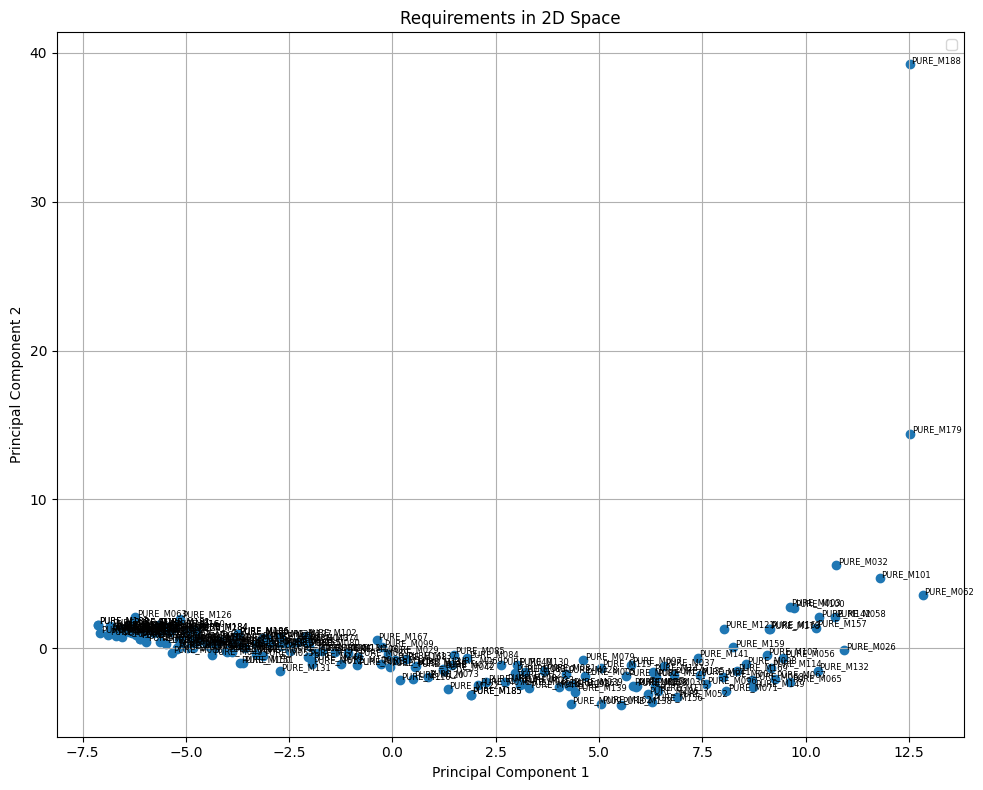

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'parsed_reqs' is a dictionary where each entry contains 'req_we' key with word embeddings for each requirement.

# Filter out keys with no word embeddings
valid_keys = reduced_df['req_id'].values

# Collect all word embeddings into a numpy array
all_embeddings = np.array([parsed_reqs[key]['req_we'] for key in valid_keys])

# Pad sentence to fit dimensionality
max_length = max(len(rq) for rq in all_embeddings)

padded_embeddings = pad_sequences(all_embeddings, maxlen=max_length, padding='post', truncating='post', dtype='float32')
flattened_embeddings = padded_embeddings.reshape(padded_embeddings.shape[0], -1)

# Flatten the array to match the shape expected by PCA
#flattened_embeddings = np.concatenate(all_embeddings, axis=0)
#print(len(flattened_embeddings))

# Perform PCA to reduce the dimensionality to 2D
pca = PCA(n_components=57)
req_embeddings_2d = pca.fit_transform(flattened_embeddings)

# Calculate pairwise distances between embeddings
distances = pdist(req_embeddings_2d)
distance_matrix = squareform(distances)

# Mask the diagonal elements (setting them to a large value)
np.fill_diagonal(distance_matrix, np.inf)

# Find the pair of requirements with the smallest distance
min_distance_idx = np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)
req1_idx, req2_idx = min_distance_idx

# Extract X and Y coordinates for plotting
x_coords = req_embeddings_2d[:, 0]
y_coords = req_embeddings_2d[:, 1]

# Plot the requirements in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords)

# Add labels to the points for identification (optional)
for i, key in enumerate(valid_keys):
    # Check if word embedding is available for the requirement
    if i < len(req_embeddings_2d):
        # Slightly offsetting the labels for better visibility
        plt.annotate(key, (x_coords[i], y_coords[i]), fontsize=6, xytext=(1,1), textcoords='offset points')

# Highlight the pair of closest requirements
# plt.scatter(x_coords[req1_idx], y_coords[req1_idx], color='red', label='Closest Pair')
# plt.scatter(x_coords[req2_idx], y_coords[req2_idx], color='red')
# plt.annotate(valid_keys[req1_idx], (x_coords[req1_idx], y_coords[req1_idx]), fontsize=8, xytext=(5, 5), textcoords='offset points')
# plt.annotate(valid_keys[req2_idx], (x_coords[req2_idx], y_coords[req2_idx]), fontsize=8, xytext=(5, 5), textcoords='offset points')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Requirements in 2D Space')
plt.grid(True)

# Automatically adjust subplot parameters to give more space for labels
plt.tight_layout()

plt.legend()
plt.show()

# display(parsed_reqs[valid_keys[req1_idx]]['req_doc'])
# display(parsed_reqs[valid_keys[req2_idx]]['req_doc'])

We can use spatial distances to retrieve requirements based on their proximity.

In [30]:
# Create a list of tuples with pair indices and distances
pairs_with_distances = [(valid_keys[i], valid_keys[j], distance_matrix[i, j]) for i in range(len(valid_keys)) for j in range(i+1, len(valid_keys)) if valid_keys[i] != valid_keys[j]]

# Sort the list based on distances
sorted_pairs = sorted(pairs_with_distances, key=lambda x: x[2])

# Print the first 10 pairs
for idx in range(min(10, len(sorted_pairs))):
    req1_idx, req2_idx, distance = sorted_pairs[idx]
    print(f"Pair: ({req1_idx, req2_idx}), Distance: {distance}")


Pair: (('PURE_M150', 'PURE_M151')), Distance: 1.4470024888011002
Pair: (('PURE_M044', 'PURE_M045')), Distance: 2.2998689333380877
Pair: (('PURE_M020', 'PURE_M019')), Distance: 2.946807147238097
Pair: (('PURE_M024', 'PURE_M015')), Distance: 3.0072802581411917
Pair: (('PURE_M022', 'PURE_M019')), Distance: 3.3589597031091323
Pair: (('PURE_M022', 'PURE_M020')), Distance: 4.282518252473464
Pair: (('PURE_M061', 'PURE_M176')), Distance: 4.441705423486546
Pair: (('PURE_M035', 'PURE_M001')), Distance: 5.28157744910182
Pair: (('PURE_M015', 'PURE_M176')), Distance: 5.416635879215725
Pair: (('PURE_M115', 'PURE_M095')), Distance: 5.64556840914778


Display some examples.

In [31]:
display(reduced_df[reduced_df['req_id'] == 'PURE_M044'][['req_id','req']])
display(reduced_df[reduced_df['req_id'] == 'PURE_M045'][['req_id','req']])

,req_id,req
61,PURE_M044,when changing to a lower speed level the front end of the train shall respect the dynamic train speed profile


,req_id,req
62,PURE_M045,when changing to a higher speed level the rear end of the train shall respect the static train speed profile


In [32]:
display(reduced_df[reduced_df['req_id'] == 'PURE_M024'][['req_id','req']])
display(reduced_df[reduced_df['req_id'] == 'PURE_M015'][['req_id','req']])

,req_id,req
12,PURE_M024,the release speed shall be indicated on the dmi


,req_id,req
18,PURE_M015,a special indication shall be shown on the dmi


### 5.3 Graph-based methods

We illustrate the process of building a Semantic Relational Graph (SLR) using the previously pre-processed requirements. Intersections on the graph illustrate relations between requirements referring to common entities using parallel grammatical structures.

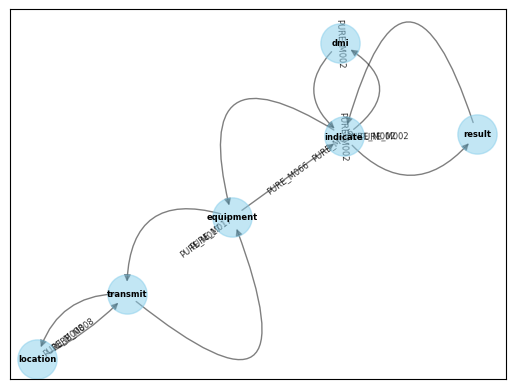

<Figure size 4000x4000 with 0 Axes>

In [33]:
import networkx as nx

def build_semantic_graph(req_id, doc):
    graph = nx.MultiDiGraph()
    for token in doc:
        if token.dep_ in ('nsubj', 'dobj', 'attr'):
            # Add predicates and their arguments as nodes
            if not graph.has_node(token.head.text):
                graph.add_node(token.head.text, pos=token.head.pos_)
            if not graph.has_node(token.text):
                graph.add_node(token.text, pos=token.pos_)
            # Add edges between predicates and their arguments
            graph.add_edge(token.head.text, token.text, pos=token.head.pos_, id=req_id, key=req_id)
            graph.add_edge(token.text, token.head.text, pos=token.pos_, id=req_id, key=req_id)
    return graph

# Apply the function to build graphs for each requirement
graphs = []
for req_id in reduced_df['req_id']:
  graphs.append(build_semantic_graph(req_id, reduced_df[reduced_df['req_id'] == req_id]['req_doc'].values[0]))
reduced_df['graph'] = graphs

# Merge all graphs
merged_graph = nx.compose_all(reduced_df['graph'])

import matplotlib.pyplot as plt
from random import randrange

# Specify a subset of nodes
#subset_nodes = ['indicate', 'dmi', 'result', 'be', 'driver', 'equipment', 'transmit', 'location', 'release', 'brake']  # Replace with actual node names
subset_nodes = ['indicate', 'dmi', 'result', 'equipment', 'transmit', 'location']  # Replace with actual node names

# Find all edges between the subset of nodes
subset_edges = [(u, v, data) for u, v, data in merged_graph.edges(data=True) if u in subset_nodes and v in subset_nodes]

# Create a subgraph containing all edges between the subset of nodes
subgraph = nx.MultiDiGraph(subset_edges)

# Visualize the subgraph
pos = nx.spring_layout(subgraph, seed=5)  # You can use a different layout if needed
#nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_size=800, node_color='skyblue', font_size=6, alpha=0.5)
nx.draw_networkx_nodes(subgraph, pos, node_size=800, node_color='skyblue', alpha=0.5)
nx.draw_networkx_labels(subgraph, pos, font_weight='bold', font_size=6)

# Add edge labels
edge_labels = {(u, v): data['id'] for u, v, data in subgraph.edges(data=True)}

# Draw arched edges
for (u, v, data) in subgraph.edges(data=True):
    nx.draw_networkx_edges(subgraph, pos, edgelist=[(u, v)], connectionstyle=f'arc3,rad={randrange(20)*0.1}', edge_color='black', alpha=0.5)

for (u, v), label in edge_labels.items():
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels={(u, v): label}, label_pos=randrange(10)*0.1, font_color='black', font_size=6, alpha=0.8, bbox=dict(alpha=0), rotate=True)

plt.figure(figsize=(40, 40))  # Adjust the figure size as needed
plt.show()

To explore the graph, you can get most dense nodes below.

In [34]:
import networkx as nx

# Assuming 'merged_graph' is your merged MultiDiGraph

# Calculate node density for each node
node_densities = {}
for node in merged_graph.nodes:
    neighbors = set(merged_graph.neighbors(node))
    density = len(merged_graph.subgraph(neighbors | {node}).edges) / (len(neighbors) * (len(neighbors) - 1)) if (len(neighbors) * (len(neighbors) - 1)) > 0 else 0
    node_densities[node] = density if not neighbors else 0

# Get nodes with the highest density
dense_nodes = sorted(node_densities, key=node_densities.get, reverse=True)

# Print or use the dense nodes as needed (filtered to first 10 instances)
print("Most dense nodes:", dense_nodes[:20])


Most dense nodes: ['indicate', 'dmi', 'result', 'be', 'the', 'sending', 'data', 'entering', 'area', 'driver', 'use', 'function', 'confirm', 'equipment', 'transmit', 'location', 'come', 'unit', 'release', 'brake']


## 5.4 Ontology-based methods

For handling ontology based files (.owl), we will use RDFLib. So first, we install the dependency.

In [35]:
pip install rdflib

We load a sample ontology based on the PURE dataset and the railway domain, focusing on some entities and two types of dependencies: 'requires' and 'refines'.

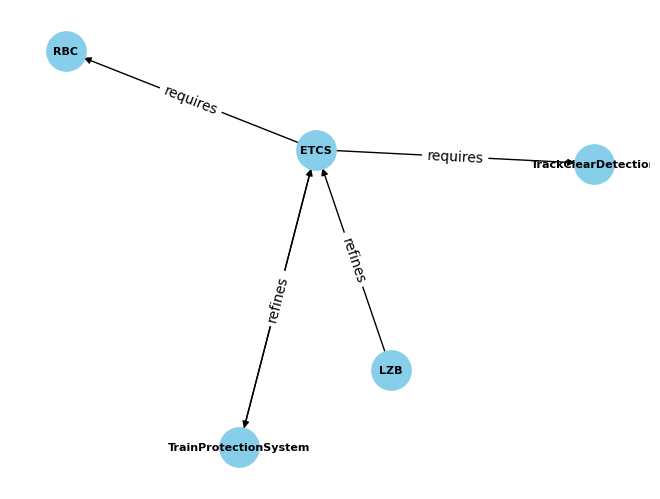

In [36]:
import requests
import io
import matplotlib.pyplot as plt
from rdflib import Graph, term
import rdflib
import networkx as nx

def download_file_from_google_drive(gdrive_link):
    # Extract file ID from the Google Drive link
    file_id = gdrive_link.split("/")[-2]

    # Construct the direct download link
    download_link = f"https://drive.google.com/uc?id={file_id}"

    # Download the file content
    response = requests.get(download_link)

    return response.content

def load_ontology_from_google_drive(gdrive_link):
    # Download the ontology file
    ontology_content = download_file_from_google_drive(gdrive_link)

    # Load the ontology using rdflib
    g = Graph()
    g.parse(data=ontology_content, format="application/rdf+xml")  # Specify the format here

    return g

def plot_ontology_graph(ontology, selected_nodes):
    # Create a directed graph using networkx
    G = nx.DiGraph()

    # Add edges and nodes to the graph
    for s, p, o in ontology:
        G.add_node(s)
        G.add_node(o)
        G.add_edge(s, o, dep=p)

    # Select a subset of nodes for visualization
    subgraph_nodes = set(selected_nodes).intersection(G.nodes)

    # Create a subgraph with selected nodes and their neighbors
    subgraph = G.subgraph(subgraph_nodes)

    # Draw the graph
    pos = nx.spring_layout(subgraph)
    node_labels = {node: node.replace('http://example.org/railway#', '') for node in subgraph.nodes}
    edge_labels = {edge: subgraph[edge[0]][edge[1]]['dep'].replace('http://example.org/railway#', '') for edge in subgraph.edges}
    nx.draw(subgraph, pos, with_labels=True, labels=node_labels, font_size=8, node_size=800, node_color='skyblue', font_color='black', font_weight='bold')
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='black')

    # Show the plot
    plt.show()
    return G

# Example usage
ontology_link = "https://drive.google.com/file/d/1b1ZkpI72BdsYumGymldUTHKsZ49PzJFy/view?usp=sharing"
ontology_graph = load_ontology_from_google_drive(ontology_link)

selected_nodes = [term.URIRef("http://example.org/railway#RBC"),
                  term.URIRef("http://example.org/railway#ETCS"),
                  term.URIRef("http://example.org/railway#TrackClearDetection"),
                  term.URIRef("http://example.org/railway#LZB"),
                  term.URIRef("http://example.org/railway#TrainProtectionSystem")]

subgraph = plot_ontology_graph(ontology_graph, selected_nodes)

Now, we cross the pre-processed requirements with the ontology to find potential dependencies matching the ontology.

In [37]:
def get_predecessors_for_node(graph, given_node):
    triplets = []
    for predecessor in graph.predecessors(given_node):
        edge_data = graph.get_edge_data(predecessor, given_node)
        # dependency types to look for
        if edge_data['dep'] in [term.URIRef('http://example.org/railway#requires'), term.URIRef('http://example.org/railway#refines')]:
          triplet = (predecessor, given_node, edge_data)
          triplets.append(triplet)

    return triplets

dependencies = []

for req_id1 in reduced_df['req_id']:
    for req_id2 in reduced_df['req_id']:
        if req_id1 != req_id2:
            for token2 in reduced_df[reduced_df['req_id'] == req_id2]['ngrams'].values[0]:
                for node in subgraph.nodes:
                    ngrams_split_2 = ''.join(word.capitalize() for word in token2.split(" "))
                    node_split_2 = node.replace('http://example.org/railway#', '')
                    if ngrams_split_2.casefold() == node_split_2.casefold():
                        for token1 in reduced_df[reduced_df['req_id'] == req_id1]['ngrams'].values[0]:
                            triplets = get_predecessors_for_node(subgraph, node)
                            for triplet in triplets:
                                ngrams_split_1 = ''.join(word.capitalize() for word in token1.split(" "))
                                node_split_1 = triplet[0].replace('http://example.org/railway#', '')
                                if ngrams_split_1.casefold() == node_split_1.casefold():
                                    dep = [req_id1, triplet[2]['dep'].split("#")[-1], req_id2]
                                    dependencies.append(dep)

def remove_duplicates(arr):
    seen = set()
    result = []

    for subarray in arr:
        # Convert the subarray to a tuple to make it hashable
        tuple_subarray = tuple(subarray)

        # Check if the subarray has been seen before
        if tuple_subarray not in seen:
            result.append(subarray)
            seen.add(tuple_subarray)

    return result

dependencies = remove_duplicates(dependencies)

Display the dependencies found.

In [38]:
display(str(len(dependencies)) + " dependencies found")
display(dependencies[:5])

'28 dependencies found'

[['PURE_M073', 'requires', 'PURE_M033'],
 ['PURE_M073', 'requires', 'PURE_M157'],
 ['PURE_M181', 'requires', 'PURE_M033'],
 ['PURE_M181', 'requires', 'PURE_M157'],
 ['PURE_M182', 'requires', 'PURE_M033']]

Now dependencies can be visualized.

In [39]:
#display(reduced_df[reduced_df['req_id'] == dependencies[0][0]])
display(reduced_df[reduced_df['req_id'] == dependencies[0][0]][['req_id','req']])
display(dependencies[0][1])
display(reduced_df[reduced_df['req_id'] == dependencies[0][2]][['req_id','req']])

,req_id,req
9,PURE_M073,the etcs on-board shall be capable of receiving information about pantograph and power supply from the trackside


'requires'

,req_id,req
13,PURE_M033,the driver shall be able to confirm the train integrity to the rbc manually the confirmation requires the train to be stationary


## 6. ML-based methods

### 6.1. Unsupervised methods

An unsupervised algorithm like k-means can be used to find clusters of requirements semantically related.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


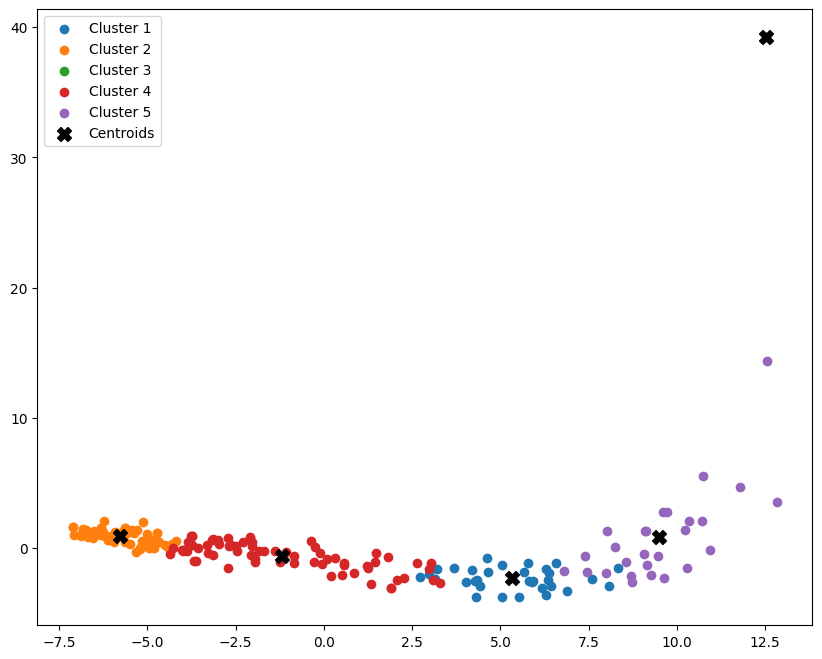

In [40]:
from sklearn.cluster import KMeans

# Assuming 'req_embeddings_2d' contains the 2D embeddings obtained from PCA

# Number of clusters for k-means
num_clusters = 5

# Run k-means clustering
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(req_embeddings_2d)
cluster_centers = kmeans.cluster_centers_

# Plot the requirements in 2D space with different colors for clusters
plt.figure(figsize=(10, 8))
for cluster_id in range(num_clusters):
    plt.scatter(x_coords[cluster_labels == cluster_id], y_coords[cluster_labels == cluster_id], label=f'Cluster {cluster_id + 1}')

# Highlight the centroids of each cluster
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black', s=100, label='Centroids')

plt.legend()
plt.show()

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between requirement embeddings and cluster centroids
centroid_similarities = cosine_similarity(cluster_centers, req_embeddings_2d)

# Get the index of the requirement with the highest similarity to each centroid
max_sim_req_indices = centroid_similarities.argmax(axis=1)

i = 0
# Get the text of the requirement with the highest similarity to each centroid
for cluster_id in max_sim_req_indices:
    req_key = valid_keys[i]
    req_text = parsed_reqs[req_key]['req_doc']
    print(f"Cluster {cluster_id + 1} Centroid's Requirement Text:")
    print("[" + req_key + "] " + str(req_text))
    print("=" * 40)
    i += 1

# Get the index of the requirement with the highest similarity score overall
max_sim_score_indices = np.unravel_index(centroid_similarities.argmax(), centroid_similarities.shape)
max_sim_req_idx = max_sim_score_indices[1]

if max_sim_req_idx < len(valid_keys):  # Check if the index is within valid range
    max_sim_req_key = valid_keys[max_sim_req_idx]
    max_sim_req_text = parsed_reqs[max_sim_req_key]['req_doc']

    print("Requirement with the Highest Similarity Score:")
    print(max_sim_req_text)


Cluster 112 Centroid's Requirement Text:
[PURE_M002] the dmi shall indicate the result of the self-test
Cluster 86 Centroid's Requirement Text:
[PURE_M016] operation of the train trip shall be indicated on the dmi
Cluster 183 Centroid's Requirement Text:
[PURE_M005] the on board shall be capable of sending train data to the trackside after confirmation by the driver or when entering the rbc area
Cluster 150 Centroid's Requirement Text:
[PURE_M042] the driver shall be able to use the reversing function without needing to re-confirm the train data
Cluster 47 Centroid's Requirement Text:
[PURE_M008] on lines fitted with rbc the etcs trainborne equipment shall be able to transmit the location of the entire train to the rbc
Requirement with the Highest Similarity Score:
trains equipped for ertms/etcs application level 3 shall be able to run on lines equipped with ertms/etcs application level 3 2 1 and 0 trains equipped for ertms/etcs application level 2 shall be able to run on lines equippe

### 6.2. Semi-supervised methods

We illustrate an Ensemble Machine Learning approach combining 3 classifiers:

- Naive Bayes
- Random Forest
- Support Vector Machine

We use 80% of the data for testing and 20% for training, using a balance representation of each class.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Limit each class to 100 instances
limited_df_m = pd.concat([
    df_m[df_m['MultiClass'] == 0].head(100),
    df_m[df_m['MultiClass'] == 3].head(100),
    df_m[df_m['MultiClass'] == 4].head(100)
], ignore_index=True)

# We use a small dataset for training and test against our dataset
train_data, test_data = train_test_split(df_m, test_size=0.90, random_state=42, stratify=df_m['MultiClass'])

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['req1'] + ' ' + train_data['req2'])
X_test = vectorizer.transform(test_data['req1'] + ' ' + test_data['req2'])


After data preparation, we fit the models.

In [43]:
# Train Naive Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, train_data['MultiClass'])

# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, train_data['MultiClass'])

# Train Support Vector Machines model
svm_classifier = SVC()
svm_classifier.fit(X_train, train_data['MultiClass'])

SVC()

Additionally, we fit a voting-based classifier for the ensemble-based approach.

In [44]:
# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('nb', nb_classifier),
    ('rf', rf_classifier),
    ('svm', svm_classifier)
], voting='hard')

# Fit the voting classifier on the training data
voting_classifier.fit(X_train, train_data['MultiClass'])

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC())])

We get the predictions using the voting classifier.

In [45]:
# Make predictions using the voting classifier
voting_predictions = voting_classifier.predict(X_test)

Finally, we evaluate the performance of the voting classifier.

In [46]:
# Evaluate the models
def evaluate_model(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(true_labels, predictions))

# Evaluate the voting classifier
print("Voting Classifier Performance:")
evaluate_model(voting_predictions, test_data['MultiClass'])

Voting Classifier Performance:
Accuracy: 0.9790602655771196
Precision: 0.9795696272569404
Recall: 0.9790602655771196
F1 Score: 0.9784553047977643

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3289
           3       1.00      0.87      0.93       326
           4       1.00      0.86      0.93       301

    accuracy                           0.98      3916
   macro avg       0.99      0.91      0.95      3916
weighted avg       0.98      0.98      0.98      3916



### 6.3 Supervised methods

We use BERT and we fine-tune the model for the task of sequence classification. We use 100 samples for each requirement dependency type, as the fine-tuning process is a time-consuming method.

First, we prepare the data.

In [47]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset, random_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming df_m is your dataframe

# Limit each class to 100 instances
limited_df_m = pd.concat([
    df_m[df_m['MultiClass'] == 0].head(100),
    df_m[df_m['MultiClass'] == 3].head(100),
    df_m[df_m['MultiClass'] == 4].head(100)
], ignore_index=True)

# Split the limited data into training and testing sets (80%-20%)
train_data, test_data = train_test_split(limited_df_m, test_size=0.2, random_state=42, stratify=limited_df_m['MultiClass'])

# BERT model fine-tuning parameters
max_length = 128
batch_size = 16
epochs = 3

# Tokenize the text data using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(train_data['req1'] + ' ' + train_data['req2']), truncation=True, padding=True, max_length=max_length, return_tensors='pt')
test_encodings = tokenizer(list(test_data['req1'] + ' ' + test_data['req2']), truncation=True, padding=True, max_length=max_length, return_tensors='pt')

# Create PyTorch datasets
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_data['MultiClass'].values))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(test_data['MultiClass'].values))

# Create PyTorch data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)  # Assuming 5 classes (0, 1, 2, 3, 4)

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * epochs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model

Then, we fine-tune the model.

In [48]:
# Fine-tune BERT on the training set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{epochs}, Average Loss: {avg_loss}')

Epoch 1/3: 100%|██████████| 15/15 [04:31<00:00, 18.10s/it]


Epoch 1/3, Average Loss: 1.3904391447703044


Epoch 2/3: 100%|██████████| 15/15 [04:17<00:00, 17.17s/it]


Epoch 2/3, Average Loss: 0.9959117889404296


Epoch 3/3: 100%|██████████| 15/15 [04:14<00:00, 16.99s/it]

Epoch 3/3, Average Loss: 0.7741195718447368


Finally, we evaluate the fine-tuned model on the test set.

In [49]:
# Evaluate the fine-tuned BERT model on the test set
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Evaluating'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=1)

        predictions.extend(predicted_labels.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Evaluate the fine-tuned BERT model
print("Fine-tuned BERT Performance:")
evaluate_model(predictions, true_labels)

Evaluating: 100%|██████████| 4/4 [00:20<00:00,  5.07s/it]

Fine-tuned BERT Performance:
Accuracy: 0.9166666666666666
Precision: 0.9235104669887277
Recall: 0.9166666666666666
F1 Score: 0.9176055822322653

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           3       0.94      0.85      0.89        20
           4       0.83      0.95      0.88        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

